# ***PROBLEM STATEMENT***

-if you were asked to work on targetted marketing ads on facebook.As an analyst work on customer behaviour by predicting which customer clicks on the advertisement or not would help to invest in productive time. Below are the features in the given data set.

1.   Name
2.   Email
3.   Country
4.   salary
5.   clicked

OUTPUT (i.e. clicked) Expected :

One in clicked column represents when ad is clicked and zero represents the otherwise scenario

Project code implementation by : GADDAM HEMANTH KRISHNA

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## ***Step 1 is to loading data to colab Environment***
- use google.colab library to prompt for loading data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Facebook_Ads_2.csv to Facebook_Ads_2.csv


## Read the dataset

In [8]:
FBADdata = pd.read_csv('Facebook_Ads_2.csv',encoding='ISO-8859-1') #we need to make sure while giving the dataset name
FBADdata.head() #shows initial 5 records

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


## Necessary EDA steps such as data shape and types.

In [18]:
#no of records or customers in the dataset
print('Number of customers: ',FBADdata.shape[0])
#no of records or customers who has clicked on AD
clicked = FBADdata[FBADdata['Clicked']==1]
print('Number of customers clicked: ',clicked.shape[0])
Dclicked = FBADdata[FBADdata['Clicked']==0]
print('Number of customers did not clicked: ',Dclicked.shape[0])

Number of customers:  499
Number of customers clicked:  250
Number of customers did not clicked:  249


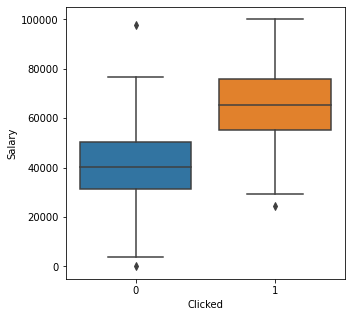

In [21]:
#plotting clicked vs salary
lt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Salary',data=FBADdata)

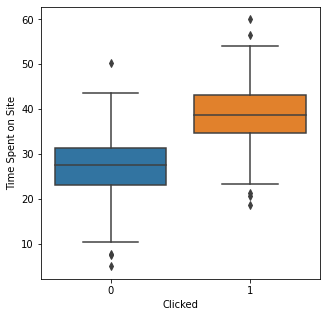

In [23]:
#plotting Timespent vs clicked
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Time Spent on Site',data=FBADdata)

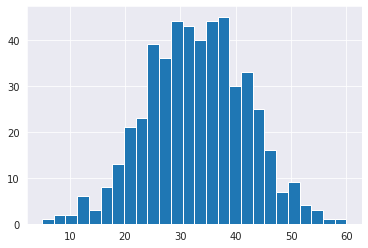

In [32]:
#Customers time spent on facebook App
#sns.set_style("dark")

FBADdata['Time Spent on Site'].hist(bins=26) #seems normally distributed

## Data Cleaning

In [33]:
#checking null values in features
FBADdata.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [34]:
#checking the data types
FBADdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [35]:
#checking correlation
FBADdata.corr()

,Time Spent on Site,Salary,Clicked
Time Spent on Site,1.000000,0.388330,0.650781
Salary,0.388330,1.000000,0.654654
Clicked,0.650781,0.654654,1.000000


In [38]:
#dropping columns such as name, email,country as they are not contributing much to output variable Clicked
FBADdata.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [39]:
FBADdata.head(3)

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0


In [41]:
X=FBADdata.iloc[:,:-1]
y=FBADdata.Clicked
X #printing training set of features

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [42]:
y #output varibale

0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    0
498    1
Name: Clicked, Length: 499, dtype: int64

In [46]:
#let's scale the values so that it would better enable the model to predict the output
MM = MinMaxScaler(feature_range = (0, 1))
X =MM.fit_transform(X)
X

array([[0.37544814, 0.55321124],
       [0.49920194, 0.79044886],
       [0.28992687, 0.41086826],
       [0.89162409, 0.37130782],
       [0.53181325, 0.37342581],
       [0.85472629, 0.8063878 ],
       [0.68875217, 0.61900778],
       [0.37594399, 0.29837379],
       [0.64905877, 0.34267972],
       [0.44886112, 0.41087096],
       [0.51404676, 0.54117841],
       [0.53692542, 0.30207979],
       [0.36933991, 0.43752748],
       [0.7552856 , 0.48653225],
       [0.59484694, 0.64688915],
       [0.36466877, 0.17743483],
       [0.65629019, 0.49453272],
       [0.35930115, 0.38472118],
       [0.79763955, 0.34761396],
       [0.41516058, 0.5163482 ],
       [0.22006501, 0.61654096],
       [0.37450538, 0.53621488],
       [0.67725799, 0.3220154 ],
       [0.58428949, 0.51724002],
       [0.49896566, 0.51668033],
       [0.27157589, 0.34250639],
       [0.63310071, 0.70497413],
       [0.46779736, 0.67015676],
       [0.34624696, 0.36462002],
       [0.61920065, 0.29164194],
       [0.

## Dividing the train and test data

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

### let's try both Logistic and RandomForestClassifier

In [57]:
LRmodel = LogisticRegression(C=2)
RFmodel = RandomForestClassifier(n_estimators=100,random_state=10)

LRmodel.fit(X_train,y_train)
RFmodel.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

###predicting the output for test data

In [58]:
LRy_predict = LRmodel.predict(X_test)
RFy_predict = RFmodel.predict(X_test)

In [61]:
print('Output for Logistic model')
print(pd.crosstab(y_test,LRy_predict))
print('accuracy for the model is: ',accuracy_score(y_test,LRy_predict))

Output for Logistic model
col_0     0   1
Clicked        
0        55   9
1         5  56
accuracy for the model is:  0.888


In [62]:
print('Output for RandomForest model')
print(pd.crosstab(y_test,RFy_predict))
print('accuracy for the model is: ',accuracy_score(y_test,RFy_predict))

Output for RandomForest model
col_0     0   1
Clicked        
0        53  11
1         7  54
accuracy for the model is:  0.856


##Model intrepretation